In [32]:
# A1. Summation Unit, Activation Unit, and Comparator Unit for Error Calculation

# a) Summation Unit
def summation_unit(inputs, weights, bias=0):
    """
    This function calculates the weighted sum of inputs.
    :param inputs: List of input values
    :param weights: List of weights corresponding to the inputs
    :param bias: Bias term, default is 0
    :return: Summation of weighted inputs + bias
    """
    assert len(inputs) == len(weights), "Inputs and weights must be of the same length"
    
    summation = sum(i * w for i, w in zip(inputs, weights)) + bias
    return summation

# b) Activation Unit

# Step Function
def step_function(x):
    """
    Step activation function.
    :param x: Input value
    :return: 1 if x >= 0, else 0
    """
    return 1 if x >= 0 else 0

# Bipolar Step Function
def bipolar_step_function(x):
    """
    Bipolar Step activation function.
    :param x: Input value
    :return: 1 if x >= 0, else -1
    """
    return 1 if x >= 0 else -1

# Sigmoid Function
import math
def sigmoid(x):
    """
    Sigmoid activation function.
    :param x: Input value
    :return: Sigmoid of the input
    """
    return 1 / (1 + math.exp(-x))

# TanH Function
def tanh(x):
    """
    TanH activation function.
    :param x: Input value
    :return: Hyperbolic tangent of the input
    """
    return math.tanh(x)

# ReLU Function
def relu(x):
    """
    ReLU activation function.
    :param x: Input value
    :return: Max between 0 and input
    """
    return max(0, x)

# Leaky ReLU Function
def leaky_relu(x, alpha=0.01):
    """
    Leaky ReLU activation function.
    :param x: Input value
    :param alpha: Slope for negative input values (default is 0.01)
    :return: x if x > 0, else alpha * x
    """
    return x if x > 0 else alpha * x

# c) Comparator Unit for Error Calculation

# Mean Squared Error (MSE)
def mean_squared_error(actual, predicted):
    """
    Calculate Mean Squared Error (MSE).
    :param actual: List of actual values
    :param predicted: List of predicted values
    :return: Mean Squared Error between actual and predicted
    """
    assert len(actual) == len(predicted), "Actual and predicted lists must be of the same length"
    
    mse = sum((a - p) ** 2 for a, p in zip(actual, predicted)) / len(actual)
    return mse

# Mean Absolute Error (MAE)
def mean_absolute_error(actual, predicted):
    """
    Calculate Mean Absolute Error (MAE).
    :param actual: List of actual values
    :param predicted: List of predicted values
    :return: Mean Absolute Error between actual and predicted
    """
    assert len(actual) == len(predicted), "Actual and predicted lists must be of the same length"
    
    mae = sum(abs(a - p) for a, p in zip(actual, predicted)) / len(actual)
    return mae

# Example usage:

# Inputs for summation unit
inputs = [0.5, 0.3, 0.2]
weights = [0.4, 0.7, 0.9]
bias = 0.1

# Summation result
summation_result = summation_unit(inputs, weights, bias)
print("Summation Result:", summation_result)

# Activation function examples
print("Step Function:", step_function(summation_result))
print("Bipolar Step Function:", bipolar_step_function(summation_result))
print("Sigmoid Function:", sigmoid(summation_result))
print("TanH Function:", tanh(summation_result))
print("ReLU Function:", relu(summation_result))
print("Leaky ReLU Function:", leaky_relu(summation_result))

# Comparator example (error calculation)
actual = [1, 0, 1]
predicted = [0.8, 0.1, 0.9]

print("Mean Squared Error:", mean_squared_error(actual, predicted))
print("Mean Absolute Error:", mean_absolute_error(actual, predicted))


Summation Result: 0.6900000000000001
Step Function: 1
Bipolar Step Function: 1
Sigmoid Function: 0.6659669267518202
TanH Function: 0.5979820004989413
ReLU Function: 0.6900000000000001
Leaky ReLU Function: 0.6900000000000001
Mean Squared Error: 0.019999999999999993
Mean Absolute Error: 0.1333333333333333


Converged after 130 epochs with error 0.00000
Final weights after training: [-0.1   0.1   0.05]


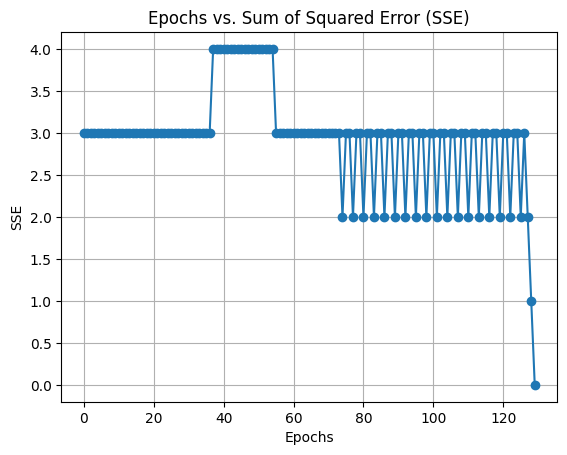

In [33]:
#A2
import numpy as np
import matplotlib.pyplot as plt

# AND Gate dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])  # Expected outputs for the AND gate

# Initialize weights: W0 = bias, W1, W2
weights = np.array([10, 0.2, -0.75])  # W0 = 10 (bias), W1 = 0.2, W2 = -0.75
learning_rate = 0.05
convergence_error = 0.002
max_epochs = 1000

# Step Activation Function
def step_function(x):
    return 1 if x >= 0 else 0

# Summation Unit
def summation(inputs, weights):
    # Calculate weighted sum (bias term + weighted sum of inputs)
    return np.dot(inputs, weights)

# Perceptron training function
def perceptron_train(inputs, targets, weights, learning_rate, max_epochs, convergence_error):
    epochs = 0
    errors = []
    
    while epochs < max_epochs:
        total_error = 0
        for i in range(len(inputs)):
            # Inputs: [1, x1, x2] where 1 is the bias term
            input_with_bias = np.insert(inputs[i], 0, 1)  # Insert bias term (1) at the start
            expected_output = targets[i]

            # Compute weighted sum (dot product of inputs and weights)
            weighted_sum = summation(input_with_bias, weights)

            # Get the perceptron output using the step activation function
            output = step_function(weighted_sum)

            # Calculate error
            error = expected_output - output

            # Update the weights if there is an error
            weights += learning_rate * error * input_with_bias

            # Accumulate the squared error
            total_error += error ** 2

        # Track the sum-squared-error (SSE) after each epoch
        errors.append(total_error)
        epochs += 1

        # Check for convergence
        if total_error <= convergence_error:
            print(f"Converged after {epochs} epochs with error {total_error:.5f}")
            break
    
    if epochs == max_epochs:
        print(f"Stopped after max epochs ({max_epochs}) with final error {total_error:.5f}")
    
    return weights, errors, epochs

# Train the perceptron model
final_weights, error_values, total_epochs = perceptron_train(
    inputs, targets, weights, learning_rate, max_epochs, convergence_error
)

# Output the final weights
print(f"Final weights after training: {final_weights}")

# Plot the epochs vs. error values
plt.plot(range(total_epochs), error_values, marker='o')
plt.title('Epochs vs. Sum of Squared Error (SSE)')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.savefig('AND Gate_epoch_SSE.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid(True)
plt.show()


Testing with Bi-Polar Step activation function:
Final weights: [-0.1   0.1   0.05]
Total epochs to converge: 1000

Testing with Sigmoid activation function:
Final weights: [-6.13531308  3.97083321  3.96394835]
Total epochs to converge: 1000

Testing with ReLU activation function:
Final weights: [-0.92774472  0.95116001  0.94981086]
Total epochs to converge: 390



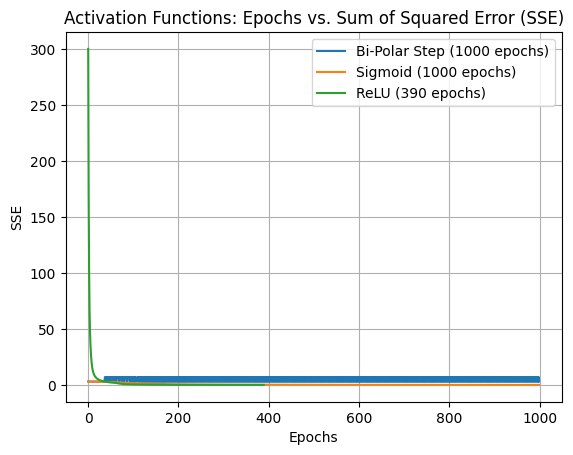

In [34]:
#A3
import numpy as np
import matplotlib.pyplot as plt
import math

# AND Gate dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])  # Expected outputs for the AND gate

# Initialize common settings
initial_weights = np.array([10, 0.2, -0.75])  # W0 = 10, W1 = 0.2, W2 = -0.75
learning_rate = 0.05
convergence_error = 0.002
max_epochs = 1000

# a) Summation Unit
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

# b) Activation Functions
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# c) Comparator (Sum-Squared Error)
def sum_squared_error(actual, predicted):
    return sum((a - p) ** 2 for a, p in zip(actual, predicted))

# Perceptron training function
def perceptron_train(activation_function):
    weights = initial_weights.copy()  # Reset weights for each experiment
    epochs = 0
    errors = []

    while epochs < max_epochs:
        total_error = 0
        predictions = []

        for i in range(len(inputs)):
            # Inputs: [1, x1, x2] where 1 is the bias term
            input_with_bias = np.insert(inputs[i], 0, 1)  # Insert bias term (1) at the start
            expected_output = targets[i]

            # Compute weighted sum and get output using the activation function
            weighted_sum = summation_unit(input_with_bias, weights)
            output = activation_function(weighted_sum)

            # Calculate error
            error = expected_output - output
            predictions.append(output)

            # Update weights using the error and input
            weights += learning_rate * error * input_with_bias

            # Accumulate the squared error
            total_error += error ** 2

        # Append sum-squared-error (SSE) after each epoch
        errors.append(total_error)
        epochs += 1

        # Check for convergence
        if total_error <= convergence_error:
            return weights, errors, epochs  # Converged

    return weights, errors, epochs  # Max epochs reached

# Test each activation function and track convergence
def run_experiments():
    activations = {
        "Bi-Polar Step": bipolar_step_function,
        "Sigmoid": sigmoid,
        "ReLU": relu
    }

    results = {}

    for name, function in activations.items():
        print(f"Testing with {name} activation function:")
        final_weights, error_values, total_epochs = perceptron_train(function)
        results[name] = (total_epochs, error_values)
        print(f"Final weights: {final_weights}")
        print(f"Total epochs to converge: {total_epochs}\n")

    return results

# Run the experiments and compare results
experiment_results = run_experiments()

# Plot the results for comparison
for activation_name, (epochs, errors) in experiment_results.items():
    plt.plot(range(epochs), errors, label=f"{activation_name} ({epochs} epochs)")

plt.title('Activation Functions: Epochs vs. Sum of Squared Error (SSE)')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.legend()
plt.savefig('AND_Gate.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid(True)
plt.show()


Testing with learning rate = 0.1:
Final weights: [-0.3   0.2   0.15]
Total epochs to converge: 68

Testing with learning rate = 0.2:
Final weights: [-0.6   0.4   0.25]
Total epochs to converge: 37

Testing with learning rate = 0.3:
Final weights: [-0.2   0.2   0.15]
Total epochs to converge: 23

Testing with learning rate = 0.4:
Final weights: [-1.2   1.    0.45]
Total epochs to converge: 23

Testing with learning rate = 0.5:
Final weights: [-1.5   1.2   0.75]
Total epochs to converge: 19

Testing with learning rate = 0.6:
Final weights: [-2.    1.4   1.05]
Total epochs to converge: 19

Testing with learning rate = 0.7:
Final weights: [-1.9   1.6   0.65]
Total epochs to converge: 15

Testing with learning rate = 0.8:
Final weights: [-2.    1.8   0.85]
Total epochs to converge: 14

Testing with learning rate = 0.9:
Final weights: [-2.6   2.    1.05]
Total epochs to converge: 13

Testing with learning rate = 1:
Final weights: [-3.    2.2   1.25]
Total epochs to converge: 12



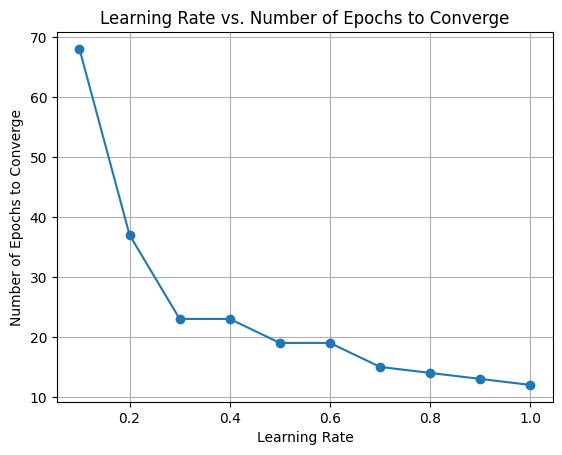

In [35]:
#A4
import numpy as np
import matplotlib.pyplot as plt
import math

# AND Gate dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])  # Expected outputs for the AND gate

# Initialize initial weights and bias
initial_weights = np.array([10, 0.2, -0.75])  # W0 = 10, W1 = 0.2, W2 = -0.75
convergence_error = 0.002
max_epochs = 1000

# a) Summation Unit
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

# b) Activation Function (Step Function for AND Gate)
def step_function(x):
    return 1 if x >= 0 else 0
# Bipolar Step Function
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
    
# TanH Function
def tanh(x):
    return math.tanh(x)
# ReLU Function
def relu(x):
    return max(0, x)

# Leaky ReLU Function
def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x
# c) Comparator (Sum-Squared Error)
def sum_squared_error(actual, predicted):
    return sum((a - p) ** 2 for a, p in zip(actual, predicted))

# Perceptron training function
def perceptron_train(learning_rate):
    weights = initial_weights.copy()  # Reset weights for each experiment
    epochs = 0
    errors = []

    while epochs < max_epochs:
        total_error = 0
        predictions = []

        for i in range(len(inputs)):
            # Inputs: [1, x1, x2] where 1 is the bias term
            input_with_bias = np.insert(inputs[i], 0, 1)  # Insert bias term (1) at the start
            expected_output = targets[i]

            # Compute weighted sum and get output using the activation function
            weighted_sum = summation_unit(input_with_bias, weights)
            output = step_function(weighted_sum)

            # Calculate error
            error = expected_output - output
            predictions.append(output)

            # Update weights using the error and input
            weights += learning_rate * error * input_with_bias

            # Accumulate the squared error
            total_error += error ** 2

        # Append sum-squared-error (SSE) after each epoch
        errors.append(total_error)
        epochs += 1

        # Check for convergence
        if total_error <= convergence_error:
            return weights, errors, epochs  # Converged

    return weights, errors, epochs  # Max epochs reached

# Test different learning rates and track convergence
def run_experiments_with_learning_rates(learning_rates):
    results = []

    for lr in learning_rates:
        print(f"Testing with learning rate = {lr}:")
        final_weights, error_values, total_epochs = perceptron_train(lr)
        results.append((lr, total_epochs))
        print(f"Final weights: {final_weights}")
        print(f"Total epochs to converge: {total_epochs}\n")

    return results

# Define learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Run the experiments
learning_rate_results = run_experiments_with_learning_rates(learning_rates)

# Plot the results: Learning rate vs Number of epochs
learning_rates, epochs_to_converge = zip(*learning_rate_results)
plt.plot(learning_rates, epochs_to_converge, marker='o')

plt.title('Learning Rate vs. Number of Epochs to Converge')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs to Converge')
plt.savefig('AND_Gate_Learning_Rate.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid(True)
plt.show()


In [36]:
#A5 1 
import numpy as np
import math

# XOR Gate dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])  # Expected outputs for XOR gate

# a) Summation Unit
def summation_unit(inputs, weights, bias=0):
    """
    This function calculates the weighted sum of inputs.
    :param inputs: List of input values
    :param weights: List of weights corresponding to the inputs
    :param bias: Bias term, default is 0
    :return: Summation of weighted inputs + bias
    """
    assert len(inputs) == len(weights), "Inputs and weights must be of the same length"
    summation = sum(i * w for i, w in zip(inputs, weights)) + bias
    return summation

# b) Activation Units

# Step Function
def step_function(x):
    return 1 if x >= 0 else 0

# Bipolar Step Function
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# ReLU Function
def relu(x):
    return max(0, x)

# Leaky ReLU Function
def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

# c) Comparator Units for Error Calculation

# Mean Squared Error (MSE)
def mean_squared_error(actual, predicted):
    assert len(actual) == len(predicted), "Actual and predicted lists must be of the same length"
    mse = sum((a - p) ** 2 for a, p in zip(actual, predicted)) / len(actual)
    return mse

# Mean Absolute Error (MAE)
def mean_absolute_error(actual, predicted):
    assert len(actual) == len(predicted), "Actual and predicted lists must be of the same length"
    mae = sum(abs(a - p) for a, p in zip(actual, predicted)) / len(actual)
    return mae

# Example usage of summation unit and activation functions with XOR inputs
weights = np.array([0.1, 0.5, -0.5])  # Example weights including bias
bias = 0.0

for i in range(len(inputs)):
    # Insert bias term (1) at the start
    input_with_bias = np.insert(inputs[i], 0, 1)  
    summation_result = summation_unit(input_with_bias, weights, bias)
    
    # Activation function examples
    print(f"Inputs: {inputs[i]}")
    print("Summation Result:", summation_result)
    print("Step Function Output:", step_function(summation_result))
    print("Bipolar Step Function Output:", bipolar_step_function(summation_result))
    print("Sigmoid Function Output:", sigmoid(summation_result))
    print("ReLU Function Output:", relu(summation_result))
    print("Leaky ReLU Function Output:", leaky_relu(summation_result))
    print()

# Comparator example (error calculation)
# Simulating the predicted outputs for one of the activation functions
predicted = [step_function(summation_unit(np.insert(inputs[i], 0, 1), weights, bias)) for i in range(len(inputs))]
print("Predicted Outputs (Step Function):", predicted)
print("Mean Squared Error:", mean_squared_error(targets, predicted))
print("Mean Absolute Error:", mean_absolute_error(targets, predicted))


Inputs: [0 0]
Summation Result: 0.1
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function Output: 0.52497918747894
ReLU Function Output: 0.1
Leaky ReLU Function Output: 0.1

Inputs: [0 1]
Summation Result: -0.4
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.401312339887548
ReLU Function Output: 0
Leaky ReLU Function Output: -0.004

Inputs: [1 0]
Summation Result: 0.6
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function Output: 0.6456563062257954
ReLU Function Output: 0.6
Leaky ReLU Function Output: 0.6

Inputs: [1 1]
Summation Result: 0.09999999999999998
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function Output: 0.5249791874789399
ReLU Function Output: 0.09999999999999998
Leaky ReLU Function Output: 0.09999999999999998

Predicted Outputs (Step Function): [1, 0, 1, 1]
Mean Squared Error: 0.75
Mean Absolute Error: 0.75


Stopped after max epochs (1000) with final error 4.00000
Final weights after training: [ 0.1 -0.1 -0.1]


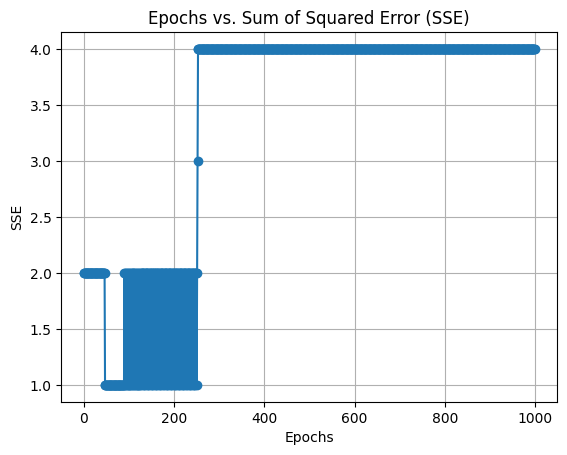

In [37]:
#A5 2 
import numpy as np
import matplotlib.pyplot as plt

# XOR Gate dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])  # Expected outputs for XOR gate

# Initialize weights: W0 = bias, W1, W2
weights = np.array([10, 0.2, -0.75])  # W0 = 10 (bias), W1 = 0.2, W2 = -0.75
learning_rate = 0.05
convergence_error = 0.002
max_epochs = 1000

# Step Activation Function
def step_function(x):
    return 1 if x >= 0 else 0

# Summation Unit
def summation(inputs, weights):
    # Calculate weighted sum (bias term + weighted sum of inputs)
    return np.dot(inputs, weights)

# Perceptron training function
def perceptron_train(inputs, targets, weights, learning_rate, max_epochs, convergence_error):
    epochs = 0
    errors = []
    
    while epochs < max_epochs:
        total_error = 0
        for i in range(len(inputs)):
            # Inputs: [1, x1, x2] where 1 is the bias term
            input_with_bias = np.insert(inputs[i], 0, 1)  # Insert bias term (1) at the start
            expected_output = targets[i]

            # Compute weighted sum (dot product of inputs and weights)
            weighted_sum = summation(input_with_bias, weights)

            # Get the perceptron output using the step activation function
            output = step_function(weighted_sum)

            # Calculate error
            error = expected_output - output

            # Update the weights if there is an error
            weights += learning_rate * error * input_with_bias

            # Accumulate the squared error
            total_error += error ** 2

        # Track the sum-squared-error (SSE) after each epoch
        errors.append(total_error)
        epochs += 1

        # Check for convergence
        if total_error <= convergence_error:
            print(f"Converged after {epochs} epochs with error {total_error:.5f}")
            break
    
    if epochs == max_epochs:
        print(f"Stopped after max epochs ({max_epochs}) with final error {total_error:.5f}")
    
    return weights, errors, epochs

# Train the perceptron model
final_weights, error_values, total_epochs = perceptron_train(
    inputs, targets, weights, learning_rate, max_epochs, convergence_error
)

# Output the final weights
print(f"Final weights after training: {final_weights}")

# Plot the epochs vs. error values
plt.plot(range(total_epochs), error_values, marker='o')
plt.title('Epochs vs. Sum of Squared Error (SSE)')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.savefig('XOR Gate_epoch_SSE.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid(True)
plt.show()




Testing with Bi-Polar Step activation function:
Final weights: [ 0.2  -0.1  -0.15]
Total epochs to converge: 1000

Testing with Sigmoid activation function:
Final weights: [ 0.02876923 -0.05348673 -0.02819591]
Total epochs to converge: 1000

Testing with ReLU activation function:
Final weights: [ 0.52631579 -0.05263158 -0.02631579]
Total epochs to converge: 1000



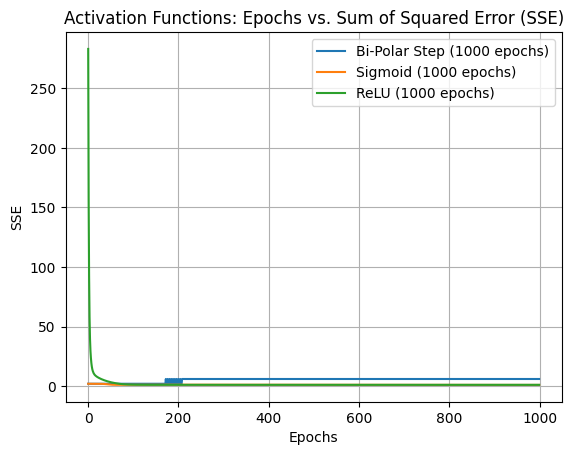

In [38]:
#A5 3 
import numpy as np
import matplotlib.pyplot as plt

# XOR Gate dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])  # Expected outputs for XOR gate

# Initialize common settings
initial_weights = np.array([10, 0.2, -0.75])  # W0 = 10, W1 = 0.2, W2 = -0.75
learning_rate = 0.05
convergence_error = 0.002
max_epochs = 1000

# a) Summation Unit
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

# b) Activation Functions
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# c) Comparator (Sum-Squared Error)
def sum_squared_error(actual, predicted):
    return sum((a - p) ** 2 for a, p in zip(actual, predicted))

# Perceptron training function
def perceptron_train(activation_function):
    weights = initial_weights.copy()  # Reset weights for each experiment
    epochs = 0
    errors = []

    while epochs < max_epochs:
        total_error = 0
        predictions = []

        for i in range(len(inputs)):
            # Inputs: [1, x1, x2] where 1 is the bias term
            input_with_bias = np.insert(inputs[i], 0, 1)  # Insert bias term (1) at the start
            expected_output = targets[i]

            # Compute weighted sum and get output using the activation function
            weighted_sum = summation_unit(input_with_bias, weights)
            output = activation_function(weighted_sum)

            # Calculate error
            error = expected_output - output
            predictions.append(output)

            # Update weights using the error and input
            weights += learning_rate * error * input_with_bias

            # Accumulate the squared error
            total_error += error ** 2

        # Append sum-squared-error (SSE) after each epoch
        errors.append(total_error)
        epochs += 1

        # Check for convergence
        if total_error <= convergence_error:
            return weights, errors, epochs  # Converged

    return weights, errors, epochs  # Max epochs reached

# Test each activation function and track convergence
def run_experiments():
    activations = {
        "Bi-Polar Step": bipolar_step_function,
        "Sigmoid": sigmoid,
        "ReLU": relu
    }

    results = {}

    for name, function in activations.items():
        print(f"Testing with {name} activation function:")
        final_weights, error_values, total_epochs = perceptron_train(function)
        results[name] = (total_epochs, error_values)
        print(f"Final weights: {final_weights}")
        print(f"Total epochs to converge: {total_epochs}\n")

    return results

# Run the experiments and compare results
experiment_results = run_experiments()

# Plot the results for comparison
for activation_name, (epochs, errors) in experiment_results.items():
    plt.plot(range(epochs), errors, label=f"{activation_name} ({epochs} epochs)")

plt.title('Activation Functions: Epochs vs. Sum of Squared Error (SSE)')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.legend()
plt.savefig('XOR_Gate.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid(True)
plt.show()


In [39]:
#A6
import numpy as np

# Customer data
# Features: [Candies, Mangoes, Milk Packets, Payment]
X = np.array([
    [20, 6, 2, 386],  # C_1
    [16, 3, 6, 289],  # C_2
    [27, 6, 2, 393],  # C_3
    [19, 1, 2, 110],  # C_4
    [24, 4, 2, 280],  # C_5
    [22, 1, 5, 167],  # C_6
    [15, 4, 2, 271],  # C_7
    [18, 4, 2, 274],  # C_8
    [21, 1, 4, 148],  # C_9
    [16, 2, 4, 198]   # C_10
])

# Target values: 1 for 'Yes' (high value), 0 for 'No' (low value)
y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Perceptron training function
def perceptron_train(X, y, learning_rate=0.01, max_epochs=1000):
    # Initialize weights randomly
    weights = np.random.rand(X.shape[1]) * 0.1 - 0.05  # Random weights for features
    bias = np.random.rand(1) * 0.1 - 0.05  # Random bias
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            # Calculate weighted sum
            weighted_sum = np.dot(X[i], weights) + bias
            
            # Apply sigmoid activation function
            output = sigmoid(weighted_sum)
            
            # Calculate error
            error = y[i] - output
            total_error += error ** 2
            
            # Update weights and bias
            weights += learning_rate * error * sigmoid_derivative(output) * X[i]
            bias += learning_rate * error * sigmoid_derivative(output)

        errors.append(total_error)
        if total_error < 0.01:  # Check for convergence
            print(f"Converged after {epoch+1} epochs with error {total_error:.5f}")
            break

    return weights, bias, errors

# Train the perceptron model
final_weights, final_bias, error_values = perceptron_train(X, y, learning_rate=0.1)

# Output final weights and bias
print(f"Final weights: {final_weights}")
print(f"Final bias: {final_bias}")

# Predictions
predictions = [1 if sigmoid(np.dot(X[i], final_weights) + final_bias) >= 0.5 else 0 for i in range(len(X))]
print("Predicted Outputs:", predictions)

# Check the performance
accuracy = np.mean(predictions == y) * 100
print(f"Accuracy: {accuracy:.2f}%")


Final weights: [-0.05875971 -0.03077164  0.00432316 -0.42683573]
Final bias: [-0.03223361]
Predicted Outputs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 40.00%


In [40]:
#A7
from numpy.linalg import pinv

# Calculate weights using pseudo-inverse
X_with_bias = np.hstack((np.ones((features.shape[0], 1)), features))  # Add bias term
pseudo_inverse_weights = pinv(X_with_bias) @ high_value

print(f"Pseudo-Inverse Weights: {pseudo_inverse_weights}")
import numpy as np
from numpy.linalg import pinv

# Example: define features and high_value (replace this with your actual data)
features = np.array([[1.2, 2.3], [2.1, 3.4], [3.1, 4.7]])  # Example feature matrix
high_value = np.array([1.5, 2.5, 3.5])  # Example target values

# Add bias term (column of ones) to the features matrix
X_with_bias = np.hstack((np.ones((features.shape[0], 1)), features))

# Calculate weights using pseudo-inverse
pseudo_inverse_weights = pinv(X_with_bias) @ high_value

print(f"Pseudo-Inverse Weights: {pseudo_inverse_weights}")


Pseudo-Inverse Weights: [ 1.35714286  2.85714286 -1.42857143]
Pseudo-Inverse Weights: [ 1.35714286  2.85714286 -1.42857143]


Stopped after max epochs (1000) with final error 0.58755
Final weights:
v11: [-1.03664414], v12: [-0.41648869], v21: [-0.63925272], v22: [-0.80194039], w1: [-1.75290571], w2: [-1.30668854]


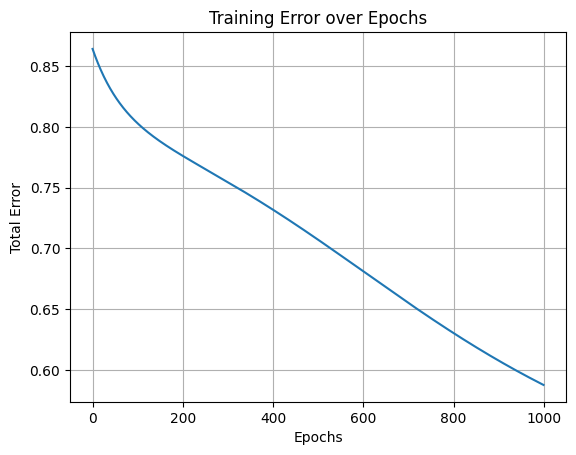

In [41]:
#A8
import numpy as np

# AND Gate dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [0], [0], [1]])  # Expected outputs for AND gate

# Parameters
learning_rate = 0.05
max_epochs = 1000
convergence_error = 0.002

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights randomly with mean 0
np.random.seed(42)  # Seed for reproducibility
v11 = np.random.uniform(-0.5, 0.5)  # Weight from input A to H1
v12 = np.random.uniform(-0.5, 0.5)  # Weight from input A to H2
v21 = np.random.uniform(-0.5, 0.5)  # Weight from input B to H1
v22 = np.random.uniform(-0.5, 0.5)  # Weight from input B to H2
w1 = np.random.uniform(-0.5, 0.5)    # Weight from H1 to O1
w2 = np.random.uniform(-0.5, 0.5)    # Weight from H2 to O1

# Training function
def train(inputs, targets):
    global v11, v12, v21, v22, w1, w2
    epochs = 0
    errors = []

    while epochs < max_epochs:
        total_error = 0

        for i in range(len(inputs)):
            # Forward pass
            A, B = inputs[i]
            # Calculate hidden layer activations
            H1 = sigmoid(A * v11 + B * v21)
            H2 = sigmoid(A * v12 + B * v22)

            # Calculate output
            O1 = sigmoid(H1 * w1 + H2 * w2)

            # Calculate error
            error = targets[i] - O1
            total_error += np.sum(error ** 2)

            # Backpropagation
            # Calculate output layer gradients
            dO1 = error * sigmoid_derivative(O1)

            # Update weights from hidden to output layer
            w1 += learning_rate * dO1 * H1
            w2 += learning_rate * dO1 * H2

            # Calculate hidden layer gradients
            dH1 = dO1 * w1 * sigmoid_derivative(H1)
            dH2 = dO1 * w2 * sigmoid_derivative(H2)

            # Update weights from input to hidden layer
            v11 += learning_rate * dH1 * A
            v12 += learning_rate * dH2 * A
            v21 += learning_rate * dH1 * B
            v22 += learning_rate * dH2 * B

        # Store the total error for this epoch
        errors.append(total_error)

        # Check for convergence
        if total_error <= convergence_error:
            print(f"Converged after {epochs + 1} epochs with error {total_error:.5f}")
            break

        epochs += 1

    if epochs == max_epochs:
        print(f"Stopped after max epochs ({max_epochs}) with final error {total_error:.5f}")

    return errors

# Train the neural network
training_errors = train(inputs, targets)

# Print final weights
print("Final weights:")
print(f"v11: {v11}, v12: {v12}, v21: {v21}, v22: {v22}, w1: {w1}, w2: {w2}")

# Optionally, plot the training error
import matplotlib.pyplot as plt

plt.plot(training_errors)
plt.title('Training Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.grid(True)
plt.show()


In [42]:
#A9 
import numpy as np
import math

# XOR Gate dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])  # Expected outputs for XOR gate

# a) Summation Unit
def summation_unit(inputs, weights, bias=0):
    """
    This function calculates the weighted sum of inputs.
    :param inputs: List of input values
    :param weights: List of weights corresponding to the inputs
    :param bias: Bias term, default is 0
    :return: Summation of weighted inputs + bias
    """
    assert len(inputs) == len(weights), "Inputs and weights must be of the same length"
    summation = sum(i * w for i, w in zip(inputs, weights)) + bias
    return summation

# b) Activation Units

# Step Function
def step_function(x):
    return 1 if x >= 0 else 0

# Bipolar Step Function
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# ReLU Function
def relu(x):
    return max(0, x)

# Leaky ReLU Function
def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

# c) Comparator Units for Error Calculation

# Mean Squared Error (MSE)
def mean_squared_error(actual, predicted):
    assert len(actual) == len(predicted), "Actual and predicted lists must be of the same length"
    mse = sum((a - p) ** 2 for a, p in zip(actual, predicted)) / len(actual)
    return mse

# Mean Absolute Error (MAE)
def mean_absolute_error(actual, predicted):
    assert len(actual) == len(predicted), "Actual and predicted lists must be of the same length"
    mae = sum(abs(a - p) for a, p in zip(actual, predicted)) / len(actual)
    return mae

# Example usage of summation unit and activation functions with XOR inputs
weights = np.array([0.1, 0.5, -0.5])  # Example weights including bias
bias = 0.0

for i in range(len(inputs)):
    # Insert bias term (1) at the start
    input_with_bias = np.insert(inputs[i], 0, 1)  
    summation_result = summation_unit(input_with_bias, weights, bias)
    
    # Activation function examples
    print(f"Inputs: {inputs[i]}")
    print("Summation Result:", summation_result)
    print("Step Function Output:", step_function(summation_result))
    print("Bipolar Step Function Output:", bipolar_step_function(summation_result))
    print("Sigmoid Function Output:", sigmoid(summation_result))
    print("ReLU Function Output:", relu(summation_result))
    print("Leaky ReLU Function Output:", leaky_relu(summation_result))
    print()

# Comparator example (error calculation)
# Simulating the predicted outputs for one of the activation functions
predicted = [step_function(summation_unit(np.insert(inputs[i], 0, 1), weights, bias)) for i in range(len(inputs))]
print("Predicted Outputs (Step Function):", predicted)
print("Mean Squared Error:", mean_squared_error(targets, predicted))
print("Mean Absolute Error:", mean_absolute_error(targets, predicted))


Inputs: [0 0]
Summation Result: 0.1
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function Output: 0.52497918747894
ReLU Function Output: 0.1
Leaky ReLU Function Output: 0.1

Inputs: [0 1]
Summation Result: -0.4
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.401312339887548
ReLU Function Output: 0
Leaky ReLU Function Output: -0.004

Inputs: [1 0]
Summation Result: 0.6
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function Output: 0.6456563062257954
ReLU Function Output: 0.6
Leaky ReLU Function Output: 0.6

Inputs: [1 1]
Summation Result: 0.09999999999999998
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function Output: 0.5249791874789399
ReLU Function Output: 0.09999999999999998
Leaky ReLU Function Output: 0.09999999999999998

Predicted Outputs (Step Function): [1, 0, 1, 1]
Mean Squared Error: 0.75
Mean Absolute Error: 0.75


Stopped after max epochs (10000) with final error 0.74049
Final weights for input to hidden layer:
[[0.80628699 6.0296827 ]
 [0.80136679 6.02391296]]
Final weights for hidden to output layer:
[[ 10.42957349 -10.56249045]
 [ -8.10626436   8.20733514]]


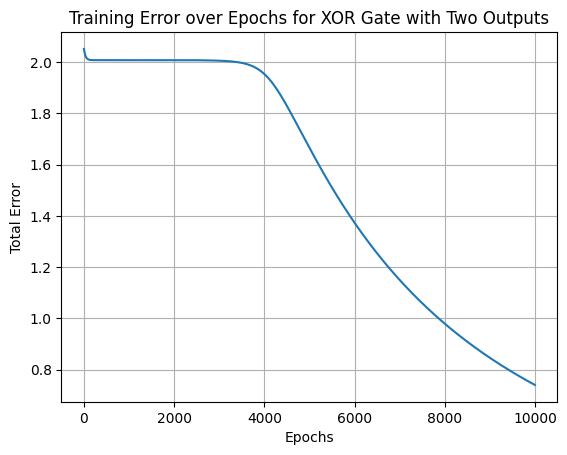

In [43]:
#A10

import numpy as np

# XOR Gate dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # [O1, O2] representation

# Parameters
learning_rate = 0.1
max_epochs = 10000
convergence_error = 0.002

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights randomly
np.random.seed(42)
weights_input_hidden = np.random.uniform(-0.5, 0.5, (2, 2))  # Hidden layer weights (2 inputs -> 2 hidden)
weights_hidden_output = np.random.uniform(-0.5, 0.5, (2, 2))  # Output layer weights (2 hidden -> 2 outputs)

# Training function
def train(inputs, targets):
    global weights_input_hidden, weights_hidden_output
    epochs = 0
    errors = []

    while epochs < max_epochs:
        total_error = 0

        for i in range(len(inputs)):
            # Forward pass
            A, B = inputs[i]
            # Calculate hidden layer activations
            hidden_input = np.dot(inputs[i], weights_input_hidden)
            hidden_output = sigmoid(hidden_input)

            # Calculate output
            output = sigmoid(np.dot(hidden_output, weights_hidden_output))

            # Calculate error
            error = targets[i] - output
            total_error += np.sum(error ** 2)

            # Backpropagation
            # Calculate output layer gradients
            d_output = error * sigmoid_derivative(output)

            # Update weights for output layer
            weights_hidden_output += learning_rate * np.outer(hidden_output, d_output)

            # Calculate hidden layer gradients
            d_hidden = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_output)

            # Update weights for hidden layer
            weights_input_hidden += learning_rate * np.outer(inputs[i], d_hidden)

        # Store the total error for this epoch
        errors.append(total_error)

        # Check for convergence
        if total_error <= convergence_error:
            print(f"Converged after {epochs + 1} epochs with error {total_error:.5f}")
            break

        epochs += 1

    if epochs == max_epochs:
        print(f"Stopped after max epochs ({max_epochs}) with final error {total_error:.5f}")

    return errors

# Train the neural network
training_errors = train(inputs, targets)

# Print final weights
print("Final weights for input to hidden layer:")
print(weights_input_hidden)
print("Final weights for hidden to output layer:")
print(weights_hidden_output)

# Optional: plot the training error
import matplotlib.pyplot as plt

plt.plot(training_errors)
plt.title('Training Error over Epochs for XOR Gate with Two Outputs')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.grid(True)
plt.show()


In [44]:
#A11
import warnings
from sklearn.neural_network import MLPClassifier
import numpy as np

# Suppress ConvergenceWarning
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Define the inputs and targets for the AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Define the inputs and targets for the XOR gate 
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create and train the MLPClassifier for the AND gate with increased max_iter
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=2000, tol=1e-4)
mlp_and.fit(X_and, y_and)

# Create and train the MLPClassifier for the XOR gate with increased max_iter
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=2000, tol=1e-4)
mlp_xor.fit(X_xor, y_xor)

# Function to test and print predictions for a given model
def test_gate(model, inputs, gate_name):
    print(f"{gate_name} predictions:")
    for input_data in inputs:
        prediction = model.predict([input_data])[0]
        print(f"Input: {input_data}, Prediction: {prediction}")
    print("\n")

# Test AND Gate
test_gate(mlp_and, X_and, "AND Gate")

# Test XOR Gate
test_gate(mlp_xor, X_xor, "XOR Gate")

AND Gate predictions:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 0


XOR Gate predictions:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 0




In [46]:
#A12
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the RFMiD dataset
data = pd.read_csv('RFMID_Training_Labels.csv')

# Separate features and labels
X = data.drop('Disease_Risk', axis=1)  
y = data['Disease_Risk'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9895833333333334
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       119
           1       1.00      0.99      0.99       457

    accuracy                           0.99       576
   macro avg       0.98      0.99      0.98       576
weighted avg       0.99      0.99      0.99       576

